In [1]:
!apt-get install gcc-4.8 gcc-5 g++-4.8 g++-5
!apt-get install libblas-dev liblapack-dev
!apt-get install libopenblas-dev
!apt-get install gfortran-4.8
!apt-get install gfortran-5
!apt-get install scons
!apt-get install libpng-dev
!apt-get install libboost-all-dev freeglut3-dev
!apt-get install xvfb
!apt-get install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-4.8 cpp-5 gcc-4.8-base gcc-5-base libasan0 libasan2 libgcc-4.8-dev
  libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev libstdc++-5-dev
Suggested packages:
  gcc-4.8-locales gcc-5-locales g++-4.8-multilib gcc-4.8-doc
  libstdc++6-4.8-dbg g++-5-multilib gcc-5-doc libstdc++6-5-dbg
  gcc-4.8-multilib libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan0-dbg libtsan0-dbg libquadmath0-dbg gcc-5-multilib libasan2-dbg
  liblsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg libstdc++-4.8-doc
  libstdc++-5-doc
The following NEW packages will be installed:
  cpp-4.8 cpp-5 g++-4.8 g++-5 gcc-4.8 gcc-4.8-base gcc-5 gcc-5-base libasan0
  libasan2 libgcc-4.8-dev libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev
  libstdc++-5-dev
0 upgraded, 16 newly installed, 0 to remove and 17 not upgraded.
Need to get 58.3 MB of archives.
After this operati

In [2]:
!pip install torch==1.3.0 rtree trimesh

     |████████████████████████████████| 773.1MB 16kB/s 
     |████████████████████████████████| 1.0MB 41.8MB/s 
     |████████████████████████████████| 634kB 43.6MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [3]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-4.8 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-4.8 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20

update-alternatives: using /usr/bin/gcc-4.8 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-4.8 to provide /usr/bin/g++ (g++) in auto mode
update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


In [4]:
%cd /content

/content


In [5]:
!git clone https://github.com/mszarski/diffsim.git

Cloning into 'diffsim'...
remote: Enumerating objects: 1209, done.
remote: Counting objects: 100% (1209/1209), done.
remote: Compressing objects: 100% (786/786), done.
remote: Total 1209 (delta 427), reused 1056 (delta 301), pack-reused 0
Receiving objects: 100% (1209/1209), 27.80 MiB | 3.61 MiB/s, done.
Resolving deltas: 100% (427/427), done.


In [6]:
!chmod +x diffsim/arcsim/dependencies/taucs/configure

In [7]:
%cd /content

/content


In [8]:
%cd diffsim
!update-alternatives --set gcc "/usr/bin/gcc-4.8"
!update-alternatives --set g++ "/usr/bin/g++-4.8"
%cd arcsim/dependencies/
!make 
%cd ../..
!update-alternatives --set gcc "/usr/bin/gcc-5"
!update-alternatives --set g++ "/usr/bin/g++-5"
!make -j 8
%cd pysim
!ln -s ../arcsim/conf ./conf
!ln -s ../arcsim/materials ./materials
!ln -s ../arcsim/meshes ./meshes


Streaming output truncated to the last 5000 lines.
   int Aj_nnz;
       ^
cc -c -O3 -Wall -fPIC -std=c99   -DMACHTYPE_ -I src/ -I build/linux/ -I external/src/   \
-DTAUCS_CORE_DCOMPLEX \
src/taucs_ccs_factor_llt.c \
-oobj/linux/taucs_ccs_factor_llt_Z.o
src/taucs_ccs_factor_llt.c: In function ‘spa_scale_add’:
src/taucs_ccs_factor_llt.c:91:14: warning: variable ‘next’ set but not used [-Wunused-but-set-variable]
   int i, ip, next;
              ^
src/taucs_ccs_factor_llt.c: In function ‘taucs_zccs_factor_llt_partial’:
src/taucs_ccs_factor_llt.c:487:7: warning: variable ‘Aj_nnz’ set but not used [-Wunused-but-set-variable]
   int Aj_nnz;
       ^
cc -c -O3 -Wall -fPIC -std=c99   -DMACHTYPE_ -I src/ -I build/linux/ -I external/src/   \
-DTAUCS_CORE_SCOMPLEX \
src/taucs_ccs_factor_llt.c \
-oobj/linux/taucs_ccs_factor_llt_C.o
src/taucs_ccs_factor_llt.c: In function ‘spa_scale_add’:
src/taucs_ccs_factor_llt.c:91:14: warning: variable ‘next’ set but not used [-Wunused-but-set-variable]
   i

In [ ]:
##restart runtime here

In [1]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [2]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/draping_workspace'       # path to your project on Drive

drive.mount(ROOT)

Mounted at /content/drive


In [3]:
%%writefile conf/double_hump_draping.json
{
    "frame_time": 0.125,
    "frame_steps": 1,
    "end_time": 10,
    "cloths": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,0.7]},
        "materials": [{"data": "materials/gray-interlock.json",
                       "thicken": 2}],
        "remeshing": {
            "refine_angle": 0.3,
            "refine_compression": 0.005,
            "refine_velocity": 0.5,
            "size": [10e-3, 100e-3],
            "aspect_min": 0.2
        }
    }
    ],
    "obstacles": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_simplified.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,-0.5]},
        "velocity": [0, 0, 0, 0, 0, 0],
        "movable": 0
    }
    ],
    "disable":["remeshing", "proximity"],
    "handles": [{"nodes": [24, 2, 153, 124]}],
    "gravity":[0, 0, -9.8],
    "magic": {"repulsion_thickness": 5e-3, "collision_stiffness": 1e6}
}

Writing conf/double_hump_draping.json


In [4]:
import trimesh
import trimesh.transformations as tf
import numpy as np

curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_simplified.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.7])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [24, 2, 153, 124]
steps = 40

trajectories = []

for handle in handles:
    ray_origin = flat_mesh.vertices[handle]
    
    ray_direction = curved_mesh.vertices[handle] - flat_mesh.vertices[handle]
    ray_direction = ray_direction

    locations, index_ray, index_tri = curved_mesh.ray.intersects_location(
        ray_origins=np.array([ray_origin]),
        ray_directions=np.array([ray_direction]))

    location = locations[0]
    path = np.dstack([np.linspace(ray_origin[0],location[0],steps),np.linspace(ray_origin[1],location[1],steps),np.linspace(ray_origin[2],location[2],steps)])

    path = path.squeeze()
    trajectories.append(path)

trajectories = np.array(trajectories) #this is positions, not vs
trajectories = np.diff(trajectories,axis=1) #vs
trajectories = trajectories.transpose(1,0,2)
trajectories = np.concatenate([trajectories,np.expand_dims(np.zeros_like(trajectories[0]),0)])

#scene.show()

In [5]:
!rm -rf /content/double_hump_draping_default_out

In [6]:
import networkx as nx
import torch
import itertools

torch_curved_v = torch.tensor(curved_mesh.vertices,dtype=torch.float64)
torch_tool_v = torch.tensor(curved_mesh.vertices, dtype=torch.float64)
torch_tool_n = torch.tensor(curved_mesh.vertex_normals, dtype=torch.float64)

#precalculate all pairs shortest paths
G = nx.Graph()
G.add_edges_from(flat_mesh.edges_unique)
P = dict(nx.all_pairs_shortest_path(G))

def contact_front_loss_graph(sim, seed_pt_idx, thresh = 5e-3):
    dists = []
    for i in range(len(sim.cloths[0].mesh.nodes)):
        dists.append(sim.cloths[0].mesh.nodes[i].x - sim.obstacles[0].curr_state_mesh.nodes[i].x)

    z_dists = torch.stack(dists)[:,2]

    pos_z_dists = torch.nn.functional.relu(z_dists)
    weights = torch.exp(-pos_z_dists/thresh)

    vertex_connectivity = torch.tensor(0.0)

    for j in range(len(sim.cloths[0].mesh.nodes)):
        vertex_connectivity += weights[P[seed_pt_idx][j]].prod()

    loss = -vertex_connectivity

    return loss

def total_contact_loss_dist(sim, exclude_indices = None, thresh = 5e-3):

    if exclude_indices is None: 
        exclude_indices = []

    one_rings = [list(G[i].keys()) for i in exclude_indices]
    exclude_indices.append(list(itertools.chain(*one_rings)))

    dists = []
    for i in range(len(sim.cloths[0].mesh.nodes)):
        if not i in exclude_indices:
          dists.append(sim.cloths[0].mesh.nodes[i].x - sim.obstacles[0].curr_state_mesh.nodes[i].x)

    z_dists = torch.stack(dists)[:,2]

    pos_z_dists = torch.nn.functional.relu(z_dists)
    contact_loss = torch.mean(torch.exp(-pos_z_dists/thresh))

    return contact_loss


def total_contact_loss_dist_normal(sim, exclude_indices = None, thresh = 5e-3):

    if exclude_indices is None: 
        exclude_indices = []

    one_rings = [list(G[i].keys()) for i in exclude_indices]
    exclude_indices.append(list(itertools.chain(*one_rings)))

    dists = []
    for i in range(len(sim.cloths[0].mesh.nodes)):
        if not i in exclude_indices:
            dists.append(torch.dot(sim.cloths[0].mesh.nodes[i].x - torch_tool_v[i],torch_tool_n[i]))

    n_dists = torch.stack(dists)

    pos_z_dists = torch.nn.functional.relu(n_dists)
    # contact_loss = torch.mean(torch.exp(-pos_z_dists/thresh))

    contact_loss = torch.mean(pos_z_dists)

    return contact_loss

In [8]:
import torch
import arcsim
import gc
import time
import json
#import sysx
import gc
import os
#import numpy as np

torch.manual_seed(0)
np.random.seed(0)

from datetime import datetime
now = datetime.now()
timestamp = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

out_path = '/content/double_hump_draping_default_out'

if not os.path.exists(out_path):
  os.mkdir(out_path)

with open('conf/double_hump_draping.json','r') as f:
  config = json.load(f)

def save_config(config, file):
  with open(file,'w') as f:
    json.dump(config, f)

save_config(config, out_path+'/conf.json')

torch.set_num_threads(8)
spf = config['frame_steps']
frame_time = config['frame_time']
scalev=1

##
steps = 20
trajectories = trajectories[:steps]

pre_steps = 5
#epochs=10
epochs=20

boundary = [ 26,  63,  91,  62,  61, 116, 124,  93, 105,  27, 157,  78,  66,
          7, 153, 103, 129,  88, 122,  99,  89, 142, 149,  44,   6, 126,
         24,  60,  21,  11,  49, 150, 136, 139,   2,  53, 117,  36,   0]

seed_pt_idx = 83

def reset_sim(sim, epoch):
  if epoch < epochs:
    arcsim.init_physics(out_path+'/conf.json', out_path+'/out%d'%epoch,False)
  else:
    arcsim.init_physics(out_path+'/conf.json',out_path+'/out',False)

def run_sim(steps,sim,param_v):

  boundary_losses = []
  seed_pt_losses = []
  contact_losses = []
  step_seed_pt_contact_losses = []


  print("step")
  for step in range(pre_steps + steps):
    print(step)

    if step > pre_steps-1:
      for i in range(len(handles)):
        sim.cloths[0].mesh.nodes[handles[i]].v += param_v[step-pre_steps,i] * spf
  
      # from IPython.core.debugger import set_trace
      # set_trace()

      # if step > steps/2 + pre_steps:
      #   step_contact_loss = contact_front_loss_graph(sim, seed_pt_idx)
      #   contact_losses.append(step_contact_loss)

      # step_seed_pt_dist = (sim.cloths[0].mesh.nodes[seed_pt_idx].x - sim.obstacles[0].curr_state_mesh.nodes[seed_pt_idx].x)
      step_seed_pt_dist = torch.dot(sim.cloths[0].mesh.nodes[seed_pt_idx].x - torch_tool_v[i],torch_tool_n[seed_pt_idx])
      # z_dist = torch.nn.functional.relu(step_seed_pt_dist[2])
      n_dist = torch.nn.functional.relu(step_seed_pt_dist)
      thresh = 5e-3
      # step_seed_pt_contact_loss = -torch.sum(torch.exp(-z_dist/thresh))
      step_seed_pt_contact_loss = -torch.sum(torch.exp(-n_dist/thresh))
      step_seed_pt_contact_losses.append(step_seed_pt_contact_loss)
      print(f"step_seed_pt_contact_loss: {step_seed_pt_contact_loss}")

      # step_seed_pt_loss = torch.norm(sim.cloths[0].mesh.nodes[seed_pt_idx].x[0:2] - sim.obstacles[0].curr_state_mesh.nodes[seed_pt_idx].x[0:2])
      step_seed_pt_loss = torch.norm(sim.cloths[0].mesh.nodes[seed_pt_idx].x - sim.obstacles[0].curr_state_mesh.nodes[seed_pt_idx].x)
      seed_pt_losses.append(step_seed_pt_loss)
      print(f"step_seed_pt_loss: {step_seed_pt_loss}")

      # step_contact_loss = total_contact_loss_dist(sim,[seed_pt_idx],5e-3)
      step_contact_loss = -total_contact_loss_dist_normal(sim,[seed_pt_idx],5e-3)
      contact_losses.append(step_contact_loss)
      print(f"step_contact_loss: {step_contact_loss}")

      #loss_idxs = [*boundary]
      # loss_idxs = [*handles]
      # step_boundary_loss = torch.tensor(0.0)
      # for i in loss_idxs:
      #   step_boundary_loss += torch.norm(sim.obstacles[0].curr_state_mesh.nodes[i].x - sim.cloths[0].mesh.nodes[i].x, p=1)

      # boundary_losses.append(step_boundary_loss)

      # print(f"contact loss: {step_contact_loss}, seed_pt_loss: {step_seed_pt_loss}, boundary loss: {step_boundary_loss}")

    arcsim.sim_step()

  # v_limit = 0.5 #was 0.25
  # stiffness = 2
  # weight = 2/30 * steps * 1/7 * len(loss_idxs)
  # v_constraint = torch.sum(weight / (1.0+torch.exp(stiffness*(1.0 - (torch.abs(param_v)/v_limit)))))

  # avg = torch.mean(param_v,dim=1,keepdim=True)
  # reg = (torch.norm(param_v-avg, dim=2)**2).mean()

  #total_loss = loss #+ reg #+ v_constraint


  # e = [0,20,40]
  # sw = [1.0,0.0,0.0]
  # cw = [0.0,1.0,0.0]
  # bw = [0.0,0.0,1.0]
  # seed_pt_weight = torch.tensor(np.interp(list(range(steps)),e,sw))
  # contact_weight = torch.tensor(np.interp(list(range(steps)),e,cw))
  # boundary_weight = torch.tensor(np.interp(list(range(steps)),e,bw))

  contact_loss_steps = torch.stack(contact_losses,dim=0)

  # contact_loss = torch.sum(contact_loss_steps*contact_weight)
  contact_loss = torch.sum(contact_loss_steps)

  # growth_rates = torch.div(contact_loss_steps[1:]+1,contact_loss_steps[:-1]+1)
  # avg_growth_rate = torch.mean(growth_rates)
  # var_growth_rate = torch.norm(growth_rates-avg_growth_rate)**2

  # step_seed_pt_dist = (sim.cloths[0].mesh.nodes[seed_pt_idx].x - sim.obstacles[0].curr_state_mesh.nodes[seed_pt_idx].x)
  # z_dist = torch.nn.functional.relu(step_seed_pt_dist[2])
  # thresh = 5e-3
  # step_seed_pt_contact_loss = -torch.sum(torch.exp(-z_dist/thresh))
  # step_seed_pt_contact_losses.append(step_seed_pt_contact_loss)
  # print(f"step_seed_pt_contact_loss: {step_seed_pt_contact_loss}")

  step_seed_pt_contact_loss_steps = torch.stack(step_seed_pt_contact_losses,dim=0)
  # seed_pt_contact_loss = torch.sum(step_seed_pt_contact_loss_steps)
  seed_pt_contact_loss = -torch.logsumexp(-step_seed_pt_contact_loss_steps*1000,0)/1000
         
  seed_pt_loss_steps = torch.stack(seed_pt_losses,dim=0)
  seed_pt_loss = torch.sum(seed_pt_loss_steps)

  # boundary_loss_steps = torch.stack(boundary_losses,dim=0)
  # boundary_loss = torch.sum(boundary_loss_steps*boundary_weight)

  # avg = torch.mean(contact_loss_steps)
  # var = torch.norm(contact_loss_steps-avg)**2
  # reg = var/steps

  #reg_lambda = 0
  # seed_pt_lambda = 1
  # contact_lambda = 1e-2
  # boundary_lambda = 1e-1
  # print(f"contact loss: {contact_loss*contact_lambda}, seed_pt_loss: {seed_pt_loss*seed_pt_lambda}, boundary loss: {boundary_loss*boundary_lambda}, var_growth_rate: {var_growth_rate}")

  # total_loss = contact_loss*contact_lambda + seed_pt_loss*seed_pt_lambda + boundary_loss*boundary_lambda

  # print(f"contact loss: {contact_loss}, var_growth_rate: {var_growth_rate} seed_pt_loss: {seed_pt_loss}")

  #total_contact_loss = total_contact_loss_dist(sim)

  #seed_pt_contact_loss = torch.tanh(2*seed_pt_contact_loss)

  seed_pt_loss = seed_pt_loss*1

  contact_loss = contact_loss*1

  print(f"contact loss: {contact_loss}, seed_pt_loss: {seed_pt_loss} seed_pt_contact_loss: {seed_pt_contact_loss}")

  total_loss = seed_pt_loss + seed_pt_contact_loss + contact_loss
  
  #- contact_loss #+ var_growth_rate*1e-2 +

  return total_loss

def do_train(cur_step,optimizer,scheduler,sim,param_v):
  epoch = 0
  while True:
    reset_sim(sim, epoch)
    st = time.time()

    optimizer.zero_grad()

    loss = run_sim(steps, sim, param_v)
    en0 = time.time()

    loss.backward(retain_graph=True)

    en1 = time.time()
    print("=======================================")
    #print(param_v.data)
    #print(param_v.grad.data)
    f.write('epoch {}:  loss={} \n'.format(epoch,  loss.data))
    print('epoch {}:  loss={} \n'.format(epoch, loss.data))

    print('forward time={}'.format(en0-st))
    print('backward time={}'.format(en1-en0))

    #param_v.grad.data[:,:,2] = torch.zeros(steps,len(handles))
    #param_v.grad.data.clamp_(-25,25)

    optimizer.step()

    arcsim.delete_mesh(sim.cloths[0].mesh)

    scheduler.step(loss.item())

    if epoch>=epochs:
      break
    epoch = epoch + 1

with open(out_path+('/log%s.txt'%timestamp),'w',buffering=1) as f:
  tot_step = 1
  sim=arcsim.get_sim()
  # reset_sim(sim)

  param_v = torch.zeros([steps, 4,3],dtype=torch.float64, requires_grad=True)
  #param_v = torch.tensor(trajectories/frame_time,dtype=torch.float64, requires_grad=True)

  # optimizer = torch.optim.Adam([param_v],lr=0.01)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=0, verbose=True)

  optimizer = torch.optim.Adam([param_v],lr=0.01)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=2, verbose=True)

  for cur_step in range(tot_step):
    do_train(cur_step,optimizer,scheduler,sim,param_v)

print("done")


step
0
1
2
3
4
5
step_seed_pt_contact_loss: -4.0629600283988303e-35
step_seed_pt_loss: 0.43078211607568156
step_contact_loss: -0.5864308243976247
6
step_seed_pt_contact_loss: -5.104734622485012e-40
step_seed_pt_loss: 0.48899352532374
step_contact_loss: -0.5940144498822164
7
step_seed_pt_contact_loss: -1.8252752605478573e-41
step_seed_pt_loss: 0.5070531315978493
step_contact_loss: -0.5897073601590368
8
step_seed_pt_contact_loss: -3.510234686820678e-40
step_seed_pt_loss: 0.4915543155811061
step_contact_loss: -0.5789929284344354
9
step_seed_pt_contact_loss: -1.4646690428184937e-37
step_seed_pt_loss: 0.4606529761950623
step_contact_loss: -0.5594559975923032
10
step_seed_pt_contact_loss: -1.216792815624849e-35
step_seed_pt_loss: 0.4384197011908344
step_contact_loss: -0.5457140554568775
11
step_seed_pt_contact_loss: -1.5160549173599058e-34
step_seed_pt_loss: 0.42549221329271686
step_contact_loss: -0.53402815279018
12
step_seed_pt_contact_loss: -1.6246533028918568e-33
step_seed_pt_loss: 0.413

In [9]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [10]:
%%writefile visualize.py
import torch
import arcsim

with torch.autograd.profiler.profile() as prof:
	  arcsim.msim(4,['arcsim','replay','/content/double_hump_draping_default_out/out', '90.0'])
print(prof)

Writing visualize.py


In [11]:
!xvfb-run -e /dev/stdout -s "-screen 0 2560x1440x24 -ac +extension GLX +render -noreset" python visualize.py

main
4
arcsim replay /content/double_hump_draping_default_out/out
reply 1 
reply 2 
reply 3 
reply 4 
reply 5 
reply 6 
/content/double_hump_draping_default_out/out/0000_
/content/double_hump_draping_default_out/out/0000_rig
reply 7 
90.0
90
/content/double_hump_draping_default_out/out/0000.bmp
/content/double_hump_draping_default_out/out/0001_
/content/double_hump_draping_default_out/out/0001_rig
/content/double_hump_draping_default_out/out/0001.bmp
/content/double_hump_draping_default_out/out/0002_
/content/double_hump_draping_default_out/out/0002_rig
/content/double_hump_draping_default_out/out/0002.bmp
/content/double_hump_draping_default_out/out/0003_
/content/double_hump_draping_default_out/out/0003_rig
/content/double_hump_draping_default_out/out/0003.bmp
/content/double_hump_draping_default_out/out/0004_
/content/double_hump_draping_default_out/out/0004_rig
/content/double_hump_draping_default_out/out/0004.bmp
/content/double_hump_draping_default_out/out/0005_
/content/double_h

In [12]:
import pathlib
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

frames = []
for bmp_file in sorted(list(pathlib.Path('/content/double_hump_draping_default_out/out').glob('*.bmp'))):
    frames.append(plt.imread(bmp_file))
    #print(bmp_file)
    

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (15,15)

fig = plt.figure()

ims = []
for i in range(len(frames)):
    im = plt.imshow(frames[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

rc('animation', html='jshtml')
ani

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('diffdrape.mp4')

In [ ]:
param_v.grad

In [ ]:
torch.save(param_v, 'trajectory.pt')

In [ ]:
trajectories - param_v.detach().numpy()

In [ ]:
import trimesh
import trimesh.transformations as tf
import numpy as np


curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_simplified.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.7])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [24, 2, 153, 124]
steps = 40

for i in range(len(handles)):

    original_path = trimesh.load_path(np.cumsum(trajectories[:,i,:],axis=0) + + flat_mesh.vertices[handles[i]])
    optimized_path = trimesh.load_path(np.cumsum(param_v.detach().numpy()[:,i,:]*0.125,axis=0) + flat_mesh.vertices[handles[i]])
    scene.add_geometry(original_path)
    scene.add_geometry(optimized_path)

scene.show()

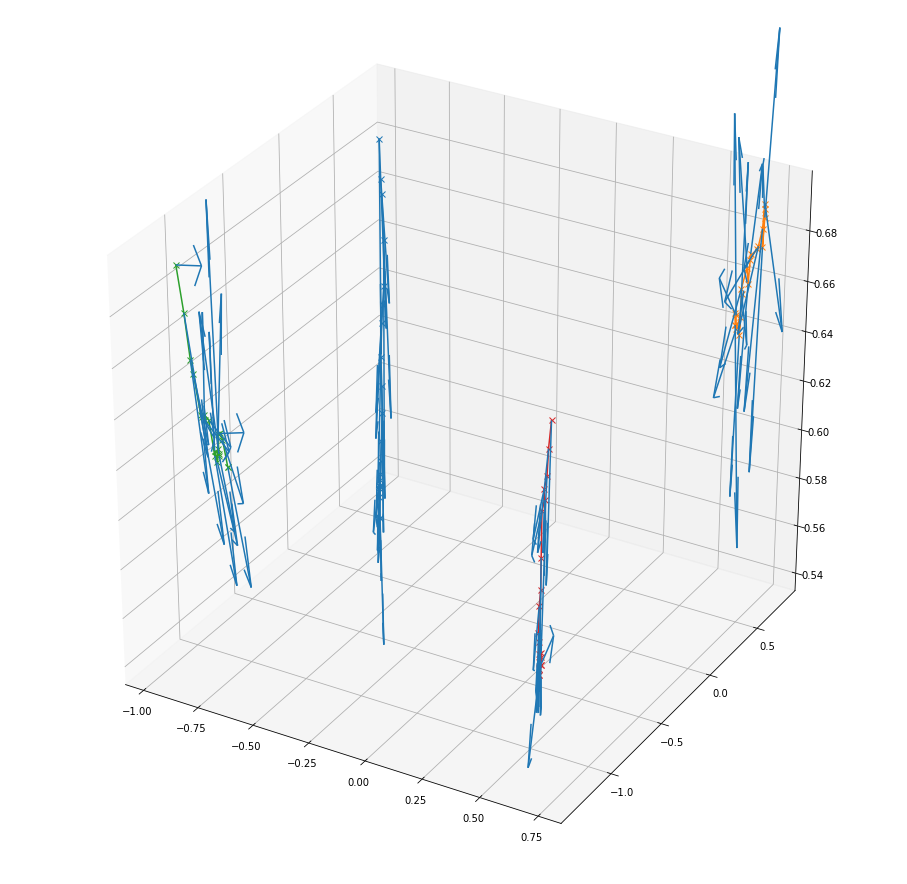

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(handles)):
    trajectory = (np.cumsum(param_v.detach().numpy()[:,i,:]*0.125,axis=0) + flat_mesh.vertices[handles[i]]).T
    grad = (param_v.detach().numpy()[:,i,:]).T
    ax.plot(trajectory[0], trajectory[1], trajectory[2], marker = 'x')
    ax.quiver(trajectory[0], trajectory[1], trajectory[2], grad[0], grad[1], grad[2], length=0.1, normalize=True) #set z component to 0 to better visualize other gradients. this seems useful

plt.show()